In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = open('/home/dy/filerepo/Research/multiagent-human-experiment/mturk/experiment_data/mturk-experiment-5-20210827-bonus-flipped.json',)
data = json.load(f)
f.close()

In [3]:
feedback_subtasks = [5, 7, 9, 11]
game_subtasks = [4, 6, 8, 10]
workers = range(len(data))
agents = [game[1] for game in data[0]['results']['data'][-1]['games']]
print(agents)

['sac_self_play_coordination_ring_0', 'nct_coordination_ring', 'action_cml_v_sac_none_no_ib', 'sac_v_bc_states_coordination_ring_0']


In [4]:
all_data = pd.DataFrame()
df = pd.DataFrame()


responses = []
for worker in workers:
    for agent in agents:
        for game_subtask in game_subtasks: #find the right subtask for the agent order
            # if (data[worker]['results']['data'][game_subtask]['data']['trajectory'][0]['player_1_id'] == agent):
            if (data[worker]['results']['data'][game_subtask]['params']['playerOne'] == agent):
                game_info = data[worker]['results']['data'][game_subtask+1]
                game_info['agent'] = agent
                game_info['workerId'] = data[worker]['workerId']
                responses.append(data[worker]['results']['data'][game_subtask+1])

df = pd.DataFrame.from_dict(responses)
df

,helpful,competent,enjoy,humanlike,efficient,flexible,predictable,partnerFeedback,agent,workerId
0,6,7,6,7,7,6,7,Nice,sac_self_play_coordination_ring_0,A32W5S5JWI020D
1,6,6,7,7,6,7,6,Nice,nct_coordination_ring,A32W5S5JWI020D
2,6,6,7,6,7,6,6,Nice,action_cml_v_sac_none_no_ib,A32W5S5JWI020D
3,6,7,6,6,7,6,7,Nice,sac_v_bc_states_coordination_ring_0,A32W5S5JWI020D
4,7,7,6,5,6,6,7,very well,sac_self_play_coordination_ring_0,A8QQAWKPF8INN
...,...,...,...,...,...,...,...,...,...,...
75,4,5,4,4,5,4,4,Good,sac_v_bc_states_coordination_ring_0,A1BISRD579W10W
76,6,7,7,6,6,7,4,GOOD,sac_self_play_coordination_ring_0,A152NBCP5LTKJF
77,6,7,6,7,6,6,7,VERY NICE,nct_coordination_ring,A152NBCP5LTKJF
78,6,7,6,7,4,6,6,VERY NICE,action_cml_v_sac_none_no_ib,A152NBCP5LTKJF


In [5]:
def get_subtask(agent, worker, game_subtasks, data):

    for game_subtask in game_subtasks: #find the right subtask for the agent order
        # if (data[worker]['results']['data'][game_subtask]['data']['trajectory'][0]['player_1_id'] == agent):
        if (data[worker]['results']['data'][game_subtask]['params']['playerOne'] == agent):
            return game_subtask
    return -1

def get_reward(worker, game_subtask, data):
    game_id = data[worker]['results']['data'][game_subtask]['trial_id']

    f = open('/home/dy/filerepo/Research/multiagent-human-experiment/server/data/server/' + game_id + '.json')
    game_data = json.load(f)    
    f.close()

    total_reward = 0

    # for timestep in data[worker]['results']['data'][game_subtask]['data']['trajectory']:
    for timestep in game_data['trajectory']:
        total_reward += timestep['reward']

    return total_reward

In [6]:
score_data = pd.DataFrame()

all_scores = []
for worker in workers:
    scores_dict = {}
    for agent in agents:
        game_subtask = get_subtask(agent, worker, game_subtasks, data)
        reward = get_reward(worker, game_subtask, data)
        scores_dict[agent] = reward
        print(worker, agent, reward)
    all_scores.append(scores_dict)




0 sac_self_play_coordination_ring_0 1
0 nct_coordination_ring 2
0 action_cml_v_sac_none_no_ib 2
0 sac_v_bc_states_coordination_ring_0 2
1 sac_self_play_coordination_ring_0 2
1 nct_coordination_ring 2
1 action_cml_v_sac_none_no_ib 2
1 sac_v_bc_states_coordination_ring_0 2
2 sac_self_play_coordination_ring_0 2
2 nct_coordination_ring 3
2 action_cml_v_sac_none_no_ib 3
2 sac_v_bc_states_coordination_ring_0 4
3 sac_self_play_coordination_ring_0 1
3 nct_coordination_ring 0
3 action_cml_v_sac_none_no_ib 3
3 sac_v_bc_states_coordination_ring_0 3
4 sac_self_play_coordination_ring_0 4
4 nct_coordination_ring 3
4 action_cml_v_sac_none_no_ib 4
4 sac_v_bc_states_coordination_ring_0 5
5 sac_self_play_coordination_ring_0 1
5 nct_coordination_ring 3
5 action_cml_v_sac_none_no_ib 3
5 sac_v_bc_states_coordination_ring_0 2
6 sac_self_play_coordination_ring_0 2
6 nct_coordination_ring 3
6 action_cml_v_sac_none_no_ib 2
6 sac_v_bc_states_coordination_ring_0 3
7 sac_self_play_coordination_ring_0 5
7 nct_coor

In [7]:
scores_df = pd.DataFrame(all_scores)
scores_df

,sac_self_play_coordination_ring_0,nct_coordination_ring,action_cml_v_sac_none_no_ib,sac_v_bc_states_coordination_ring_0
0,1,2,2,2
1,2,2,2,2
2,2,3,3,4
3,1,0,3,3
4,4,3,4,5
5,1,3,3,2
6,2,3,2,3
7,5,4,5,6
8,0,1,1,1
9,2,2,1,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f355c0cd390>,
      dtype=object)

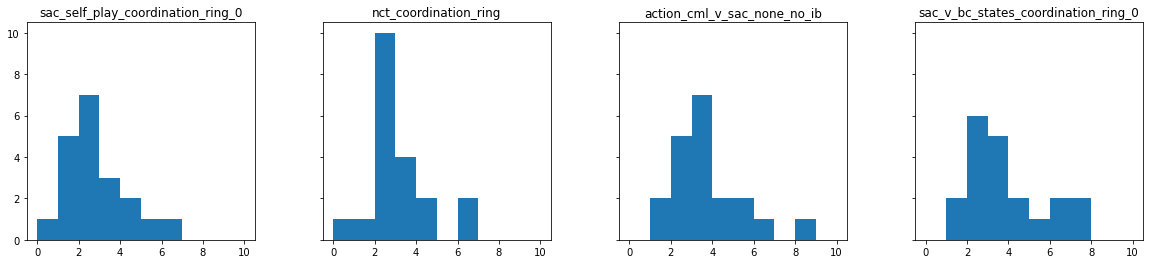

In [8]:
scores_df.hist(layout=(1,4), figsize=(20,4), sharey=True, sharex=True, grid=False, bins=range(11))

In [9]:
metrics = pd.DataFrame({'mean': scores_df.mean(), 'median': scores_df.median(), 'std': scores_df.std()})
metrics

,mean,median,std
sac_self_play_coordination_ring_0,2.35,2.0,1.496487
nct_coordination_ring,2.65,2.0,1.460894
action_cml_v_sac_none_no_ib,3.25,3.0,1.712954
sac_v_bc_states_coordination_ring_0,3.40,3.0,1.875044


In [30]:
#save soups delivered for bonus
with open('bonus.json', 'w') as f:
    # json.dump(scores_df.sum(axis=1).to_json(orient="records"), f, sort_keys=True)
    json.dump(scores_df.sum(axis=1).to_dict(), f, sort_keys=True)